In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od
import pandas as pd
import os

In [7]:
od.download(
  "https://www.kaggle.com/datasets/kazanova/sentiment140")
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/sentiment140/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ce028foramdalsaniya
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:00<00:00, 126MB/s]


In [9]:
df.tail()

,sentiment,id,date,query,user_id,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [10]:
import nltk # Python library for NLP
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt # library for visualization
import random
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('stopwords')
import re
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come␣

from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
stopwords_english = stopwords.words('english')
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
df["text"]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [15]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    upset can't update Facebook texting it... migh...
2    @Kenichan I dived many times ball. Managed sav...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599995      Just woke up Having no school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, dtype: object

In [17]:
df['text']

0          switchfoot httptwitpiccom2y1zl  Awww thats bum...
1          upset cant update Facebook texting it might cr...
2          Kenichan I dived many times ball Managed save ...
3                           whole body feels itchy like fire
4          nationwideclass no its not behaving all im mad...
                                 ...                        
1599995      Just woke up Having no school best feeling ever
1599996    TheWDBcom  Very cool hear old Walt interviews ...
1599997                  Are ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, Length: 1600000, dtype: object

In [18]:
df


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving all im mad...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool hear old Walt interviews ...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are ready MoJo Makeover Ask details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday boo alll time Tupac Amaru ...


In [19]:
df["sentiment"] = df["sentiment"].replace(4,1)
df

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving all im mad...
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool hear old Walt interviews ...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are ready MoJo Makeover Ask details
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday boo alll time Tupac Amaru ...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

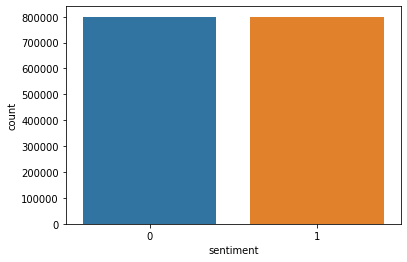

In [20]:
import seaborn as sns
sns.countplot(x="sentiment",data=df)

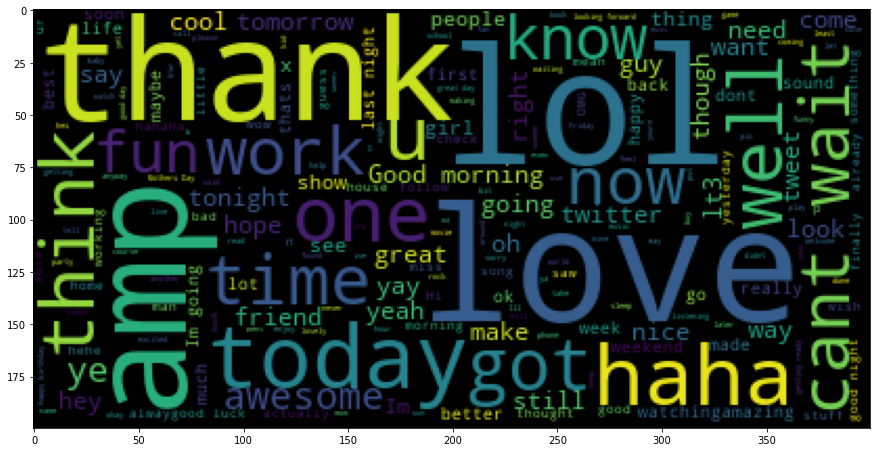

In [21]:
from wordcloud import WordCloud, STOPWORDS


positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

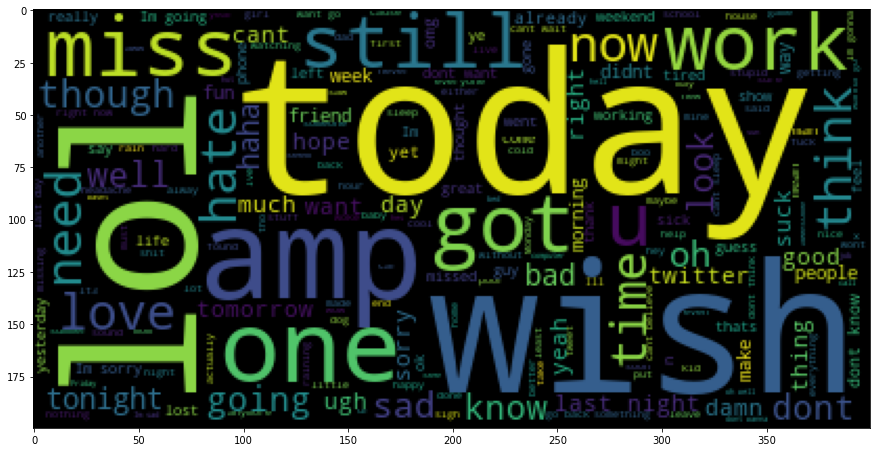

In [22]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

#Count vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

document = ["One Geek helps Two Geeks",
			"Two Geeks help Four Geeks",
			"Each Geek helps many other Geeks at GeeksforGeeks"]

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'one': 9, 'geek': 3, 'helps': 7, 'two': 11, 'geeks': 4, 'help': 6, 'four': 2, 'each': 1, 'many': 8, 'other': 10, 'at': 0, 'geeksforgeeks': 5}
Encoded Document is:
[[0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 2 0 1 0 0 0 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0]]


In [24]:
vectorizer = CountVectorizer()

vectorizer.fit(df["text"])

CountVectorizer()

In [25]:
print(vectorizer.fit(df["text"]))

CountVectorizer()


In [26]:
vectorizer.vocabulary_

{'switchfoot': 727473,
 'httptwitpiccom2y1zl': 341173,
 'awww': 65512,
 'thats': 741149,
 'bummer': 109295,
 'you': 834942,
 'shoulda': 682342,
 'got': 267117,
 'david': 170486,
 'carr': 119922,
 'third': 749237,
 'day': 171609,
 'it': 384775,
 'upset': 785644,
 'cant': 116956,
 'update': 784943,
 'facebook': 225786,
 'texting': 739273,
 'might': 505892,
 'cry': 158782,
 'result': 639203,
 'school': 665502,
 'today': 758131,
 'also': 37757,
 'blah': 89918,
 'kenichan': 427948,
 'dived': 187246,
 'many': 484885,
 'times': 754358,
 'ball': 70791,
 'managed': 483162,
 'save': 663142,
 '50': 12117,
 'the': 741433,
 'rest': 638923,
 'go': 263261,
 'bounds': 98434,
 'whole': 810083,
 'body': 94476,
 'feels': 231559,
 'itchy': 385074,
 'like': 457935,
 'fire': 235625,
 'nationwideclass': 539093,
 'no': 551060,
 'its': 385705,
 'not': 554177,
 'behaving': 79467,
 'all': 35150,
 'im': 374684,
 'mad': 478576,
 'here': 288959,
 'see': 669699,
 'over': 572354,
 'there': 745987,
 'kwesidei': 441972

In [27]:
 vector=vectorizer.transform(df["text"])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=vector
y=df["sentiment"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.5, 
                                   shuffle=True)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train, y_train)
MultinomialNB(alpha=0.1)
predictions=clf.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,predictions))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.76387375
precision: [0.75019739 0.77912317]
recall: [0.79110575 0.73664937]


In [34]:
df=df.sample(20000)
df

,sentiment,id,date,query,user_id,text
21360,0,1557263541,Sun Apr 19 03:00:34 PDT 2009,NO_QUERY,NovaWildstar,DominaCaffeine feel guilty everyone stuff but ...
1186413,1,1982944729,Sun May 31 12:12:18 PDT 2009,NO_QUERY,mcflyellie,TWEET ME BACK PLEASE
577183,0,2212340354,Wed Jun 17 13:58:35 PDT 2009,NO_QUERY,CharonDragon,Is making homemade soup Sick belly makes sanda
587847,0,2216463331,Wed Jun 17 19:31:00 PDT 2009,NO_QUERY,Fishbowl_Liz_A,I dont know do I really wanna quit but maybe I...
1566604,1,2187817062,Mon Jun 15 20:51:06 PDT 2009,NO_QUERY,duffytn,boring night squarespace
...,...,...,...,...,...,...
256032,0,1984628467,Sun May 31 15:29:11 PDT 2009,NO_QUERY,AlexCarrier,time sleep hav actually work tmrw
993388,1,1835383218,Mon May 18 05:51:57 PDT 2009,NO_QUERY,crabt003,getting caught work
1035616,1,1956210754,Thu May 28 21:24:20 PDT 2009,NO_QUERY,MCRmuffin,mcrfash1 YAY Good see someone else loves song...
1492441,1,2069287935,Sun Jun 07 15:36:11 PDT 2009,NO_QUERY,SammyBoyce,ThisisDavina Big Brother cruel I love hahahaha...


In [35]:
vectorizer = CountVectorizer()

vectorizer.fit(df["text"])
vectorizer.vocabulary_

{'dominacaffeine': 8187,
 'feel': 9900,
 'guilty': 11805,
 'everyone': 9399,
 'stuff': 28042,
 'but': 4549,
 'couldnt': 6512,
 'say': 25665,
 'jobs': 15454,
 'going': 11362,
 'game': 10909,
 'tweet': 30367,
 'me': 18706,
 'back': 2706,
 'please': 22739,
 'is': 14705,
 'making': 18199,
 'homemade': 12770,
 'soup': 27348,
 'sick': 26535,
 'belly': 3248,
 'makes': 18192,
 'sanda': 25494,
 'dont': 8235,
 'know': 16455,
 'do': 8111,
 'really': 24225,
 'wanna': 31487,
 'quit': 23579,
 'maybe': 18611,
 'ill': 14215,
 'make': 18185,
 'next': 20597,
 'week': 31698,
 'last': 16799,
 'weekmaybesighs': 31714,
 'howd': 12958,
 'get': 11103,
 'this': 29327,
 'boring': 3947,
 'night': 20706,
 'squarespace': 27574,
 'rhapsodyinbleh': 24769,
 'misses': 19312,
 'you': 32911,
 'wish': 32119,
 'could': 6510,
 'feed': 9892,
 'morelikemelissa': 19667,
 'aww': 2590,
 'lame': 16725,
 'im': 14251,
 'done': 8204,
 'school': 25744,
 'year': 32772,
 'strevitz': 27992,
 'like': 17250,
 'plans': 22695,
 'july': 157

In [36]:
vector=vectorizer.transform(df["text"])
 
X=vector
y=df["sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.5, 
                                   shuffle=True)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7106

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [0.70815879 0.71305394]
recall: [0.71270829 0.70850767]
